In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from prophet import Prophet
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.graphics.tsaplots import plot_acf
import warnings

warnings.simplefilter(action='ignore', category=ValueWarning)

c:\Users\jason\anaconda3\envs\playground\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
DATA_PATH = "https://raw.githubusercontent.com/Metaluv/Palette_Training/main/Palette_Training_5-main/data/rm-yields-data.csv"
GEO_PATH = "https://raw.githubusercontent.com/Metaluv/Palette_Training/main/Palette_Training_5-main/Rural_Municipality/Rural_Municipality.shp"

def load_data():
    return pd.read_csv(DATA_PATH)

In [28]:
def load_geo():
    return gpd.read_file(GEO_PATH)

In [29]:
load_geo()

2023-03-19 15:33:46.568 ERROR   fiona._env: `/vsimem/72242391de344a118d85a3ae2127e2b4' not recognized as a supported file format.


DriverError: '/vsimem/72242391de344a118d85a3ae2127e2b4' not recognized as a supported file format.

In [23]:
def load_merged_data():
    # Read in geo data
    geo_df = gpd.read_file('Rural_Municipality/Rural_Municipality.shp')
    geo_df.rename(columns={'RMNO': 'RM',}, inplace=True)
    geo_df['RM'] = geo_df['RM'].astype('int64')

    data_df = pd.read_csv(DATA_PATH)

    merged = geo_df.merge(data_df, on='RM', how='left')
    return merged

In [24]:
load_data()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.00,NaN,NaN,NaN,1.00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.00,NaN,NaN,NaN,16.00,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.00,NaN,NaN,NaN,23.00,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.00,NaN,NaN,NaN,32.00,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.00,NaN,NaN,NaN,35.00,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
load_merged_data()

,PPID,EFFDT,EXPDT,FEATURECD,RM,RMNM,SHAPE_AREA,SHAPE_LEN,geometry,Year,...,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1938.0,...,1.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,0.0,NaN
1,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1939.0,...,1.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,1.0,NaN
2,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1940.0,...,9.00,NaN,NaN,7.00,NaN,NaN,NaN,NaN,2.0,NaN
3,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1941.0,...,29.00,NaN,NaN,23.00,NaN,NaN,NaN,NaN,8.0,NaN
4,0101000095,2019-01-21,NaN,RMPPID,95,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5...",1942.0,...,48.00,NaN,NaN,32.00,13.0,NaN,NaN,NaN,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24828,0101000491,2022-12-21,NaN,RMPPID,491,BUCKLAND,8.095962e+08,226074.551723,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2017.0,...,109.14,NaN,38.2,56.93,NaN,NaN,NaN,NaN,NaN,NaN
24829,0101000491,2022-12-21,NaN,RMPPID,491,BUCKLAND,8.095962e+08,226074.551723,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2018.0,...,100.10,NaN,37.0,73.70,NaN,NaN,NaN,NaN,NaN,NaN
24830,0101000491,2022-12-21,NaN,RMPPID,491,BUCKLAND,8.095962e+08,226074.551723,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2019.0,...,103.60,NaN,45.1,82.10,NaN,NaN,NaN,NaN,NaN,NaN
24831,0101000491,2022-12-21,NaN,RMPPID,491,BUCKLAND,8.095962e+08,226074.551723,"POLYGON ((439451.190 5922989.290, 439441.900 5...",2020.0,...,100.60,NaN,42.2,79.10,NaN,NaN,NaN,NaN,35.0,NaN


In [30]:
def plot_choropleth_map(merged, crop):
    vmin, vmax = merged[crop].min(), merged[crop].max()
    fig, ax = plt.subplots(1, figsize=(10, 6))
    merged.plot(column=crop, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(f'{crop} Yield in Saskatchewan Rural Municipalities\n', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.annotate('Source: Saskatchewan Ministry of Agriculture', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    return fig

C:\Users\jason\AppData\Local\Temp\ipykernel_16444\3044653933.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


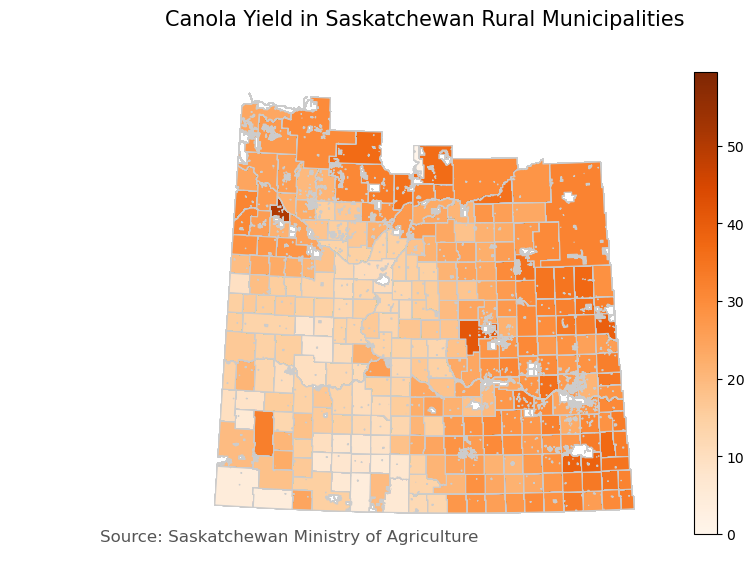

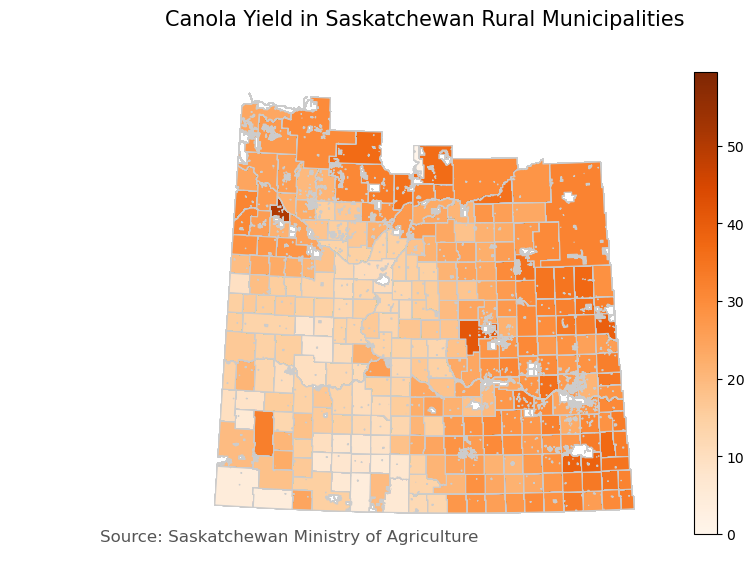

In [32]:
plot_choropleth_map(load_merged_data(), 'Canola')